### Load The Data

In [1]:
import pandas as pd

train = pd.read_csv('train_preprocessed.csv')
train.head()

,Sex,Height,Weight,Pregnancy status,Age_Adolescent,Age_Child,Age_Infant,Age_Neonate,Murmur
0,1,98.0,15.9,0,0,1,0,0,0
1,1,103.0,13.1,0,0,1,0,0,1
2,0,98.0,15.9,0,0,1,0,0,1
3,0,87.0,11.2,0,0,1,0,0,1
4,0,115.0,21.3,0,0,1,0,0,0


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               874 non-null    int64  
 1   Height            874 non-null    float64
 2   Weight            874 non-null    float64
 3   Pregnancy status  874 non-null    int64  
 4   Age_Adolescent    874 non-null    int64  
 5   Age_Child         874 non-null    int64  
 6   Age_Infant        874 non-null    int64  
 7   Age_Neonate       874 non-null    int64  
 8   Murmur            874 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 61.6 KB


In [3]:
train.describe()

,Sex,Height,Weight,Pregnancy status,Age_Adolescent,Age_Child,Age_Infant,Age_Neonate,Murmur
count,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000
mean,0.511442,115.167048,26.971968,0.077803,0.161327,0.717391,0.115561,0.005721,0.204805
std,0.500155,30.408476,17.859723,0.268015,0.368043,0.450526,0.319880,0.075463,0.403790
min,0.000000,35.000000,3.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,94.000000,13.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,117.000000,22.100000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,139.000000,35.425000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,180.000000,110.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
train['Murmur'].value_counts()

0    695
1    179
Name: Murmur, dtype: int64

In [5]:
X_train = train.drop(['Murmur'], axis=1)
y_train = train['Murmur']

In [6]:
# validation set
valid = pd.read_csv('val_preprocessed.csv')
valid.head()

,Sex,Height,Weight,Pregnancy status,Age_Adolescent,Age_Child,Age_Infant,Age_Neonate,Murmur
0,0,95.0,15.6,0,0,1,0,0,1
1,1,62.0,6.7,0,0,1,0,0,0
2,0,90.0,13.0,0,0,1,0,0,0
3,0,81.0,13.1,0,0,1,0,0,0
4,0,119.0,25.2,0,0,1,0,0,0


In [7]:
X_valid = valid.drop(['Murmur'], axis=1)
y_valid = valid['Murmur']

In [8]:
# test set
test = pd.read_csv('test_preprocessed.csv')
test.head()

,Sex,Height,Weight,Pregnancy status,Age_Adolescent,Age_Child,Age_Infant,Age_Neonate,Murmur
0,0,88.0,12.2,0,0,1,0,0,0
1,1,111.0,19.2,0,0,1,0,0,1
2,0,137.0,37.0,0,0,1,0,0,0
3,1,97.0,14.7,0,0,1,0,0,1
4,1,79.0,11.3,0,0,1,0,0,1


In [9]:
X_test = test.drop(['Murmur'], axis=1)
y_test = test['Murmur']

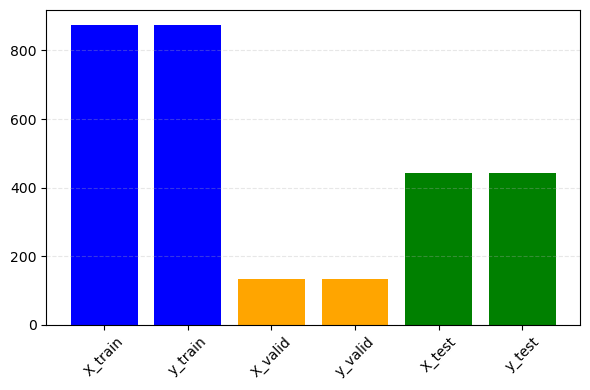

In [10]:
import matplotlib.pyplot as plt

train_data = [X_train.shape[0], y_train.shape[0]]
valid_data = [X_valid.shape[0], y_valid.shape[0]]
test_data = [X_test.shape[0], y_test.shape[0]]

labels = ['X_train', 'y_train', 'X_valid', 'y_valid', 'X_test', 'y_test']

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(labels, train_data + valid_data + test_data, color=['blue', 'blue', 'orange', 'orange', 'green', 'green'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Data Preprocessing
#### SMOTE 

In [11]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [12]:
y_resampled.value_counts()

0    695
1    695
Name: Murmur, dtype: int64

#### Near Miss

In [13]:
from imblearn.under_sampling import NearMiss

X_resampled, y_resampled = NearMiss().fit_resample(X_resampled, y_resampled)

In [14]:
y_resampled.value_counts()

0    695
1    695
Name: Murmur, dtype: int64

#### ADASYN

In [15]:
from imblearn.over_sampling import ADASYN

X_resampled, y_resampled = ADASYN().fit_resample(X_resampled, y_resampled)

In [16]:
X_resampled

,Sex,Height,Weight,Pregnancy status,Age_Adolescent,Age_Child,Age_Infant,Age_Neonate
0,1,98.000000,15.900000,0,0,1,0,0
1,0,115.000000,21.300000,0,0,1,0,0
2,1,92.000000,14.000000,0,0,1,0,0
3,1,98.000000,17.700000,0,0,1,0,0
4,1,90.000000,14.400000,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1385,0,171.181978,99.479856,0,1,0,0,0
1386,0,172.900961,91.695802,0,1,0,0,0
1387,0,174.000000,108.600000,0,1,0,0,0
1388,0,178.247820,104.847759,0,1,0,0,0


In [17]:
y_resampled.value_counts()

0    695
1    695
Name: Murmur, dtype: int64

In [18]:
X_train = X_resampled.copy()
y_train = y_resampled.copy()

### Models
#### SVM

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform


param_dist = {'C': uniform(0.1, 100),
              'gamma': uniform(0.01, 10)}

svm = SVC(kernel='rbf')

random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'C': 77.22703466859457, 'gamma': 0.7504465173409036}
Best Score: 0.6057553956834532


In [20]:
# Extract the best parameters
best_params = random_search.best_params_
# Create SVM classifier with the best parameters
best_svc_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_svc_model.fit(X_train, y_train)

SVC(C=77.22703466859457, gamma=0.7504465173409036)

In [21]:
from sklearn.metrics import classification_report

def print_classification_report(X_test, y_test, model):
    y_pred = model.predict(X_test)
    cr = classification_report(y_test, y_pred)
    print(cr)

In [22]:
print_classification_report(X_test, y_test, best_svc_model)

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       343
           1       0.27      0.28      0.28        99

    accuracy                           0.67       442
   macro avg       0.53      0.53      0.53       442
weighted avg       0.68      0.67      0.67       442



In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def show_confusion_matrix(model, model_name):
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    cmap = plt.cm.Greens
    disp.plot(cmap=cmap)
    plt.title(f"Confusion Matrix of {model_name}")
    plt.show()

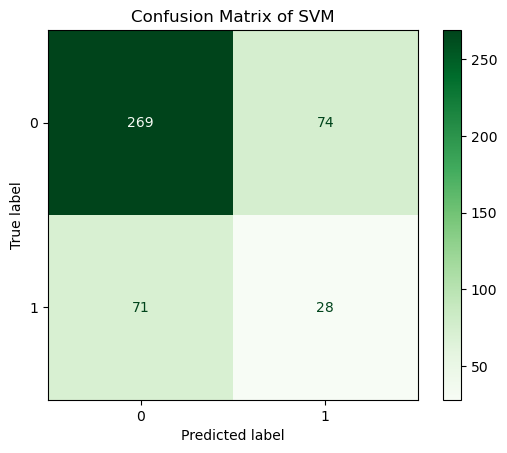

In [24]:
show_confusion_matrix(best_svc_model, "SVM")

#### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

param_dist = {'max_depth': randint(5, 20),
              'min_samples_split': randint(2, 20),
              'min_samples_leaf': randint(1, 20),
              'criterion': ['gini', 'entropy']}


dt_classifier = DecisionTreeClassifier()


random_search_dt = RandomizedSearchCV(dt_classifier, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_search_dt.fit(X_train, y_train)

print("Best Parameters:", random_search_dt.best_params_)
print("Best Score:", random_search_dt.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 5, 'min_samples_split': 4}
Best Score: 0.6028776978417267


In [26]:
# Extract the best Decision Tree model
best_dt_model = random_search_dt.best_estimator_

In [27]:
print_classification_report(X_test, y_test, best_dt_model)

              precision    recall  f1-score   support

           0       0.79      0.62      0.69       343
           1       0.24      0.42      0.31        99

    accuracy                           0.58       442
   macro avg       0.52      0.52      0.50       442
weighted avg       0.67      0.58      0.61       442



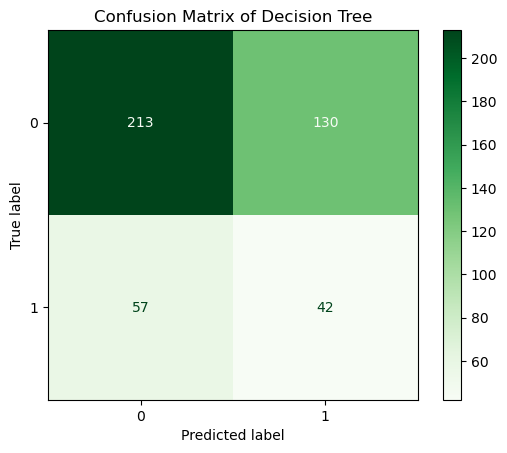

In [28]:
show_confusion_matrix(best_dt_model, "Decision Tree")

#### KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

param_dist = {'n_neighbors': randint(10, 50),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

knn_classifier = KNeighborsClassifier()

random_search_knn = RandomizedSearchCV(knn_classifier, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_search_knn.fit(X_train, y_train)

print("Best Parameters:", random_search_knn.best_params_)
print("Best Score:", random_search_knn.best_score_)

Best Parameters: {'algorithm': 'brute', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Best Score: 0.576978417266187


In [30]:
# Extract the best KNN model
best_knn_model = random_search_knn.best_estimator_

In [31]:
print_classification_report(X_test, y_test, best_knn_model)

              precision    recall  f1-score   support

           0       0.80      0.60      0.69       343
           1       0.26      0.49      0.34        99

    accuracy                           0.57       442
   macro avg       0.53      0.55      0.51       442
weighted avg       0.68      0.57      0.61       442



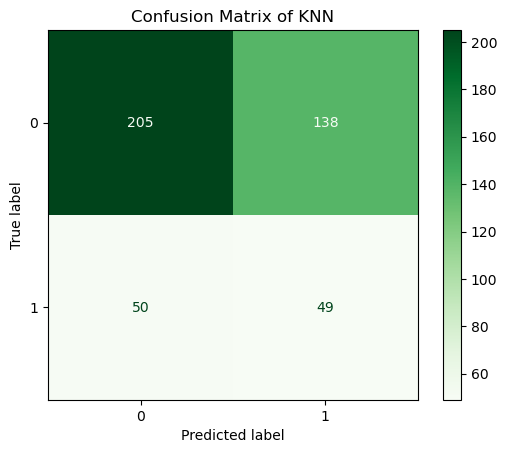

In [32]:
show_confusion_matrix(best_knn_model, "KNN")

#### MLP

In [33]:
import tensorflow as tf

def create_mlp_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model


mlp_model = create_mlp_model(input_shape=X_train.shape[1:])
mlp_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

history = mlp_model.fit(X_train, y_train, epochs=35, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/35
44/44 [==============================] - 1s 8ms/step - loss: 0.9113 - accuracy: 0.5108 - val_loss: 0.9410 - val_accuracy: 0.2030
Epoch 2/35
44/44 [==============================] - 0s 3ms/step - loss: 0.7534 - accuracy: 0.5144 - val_loss: 0.5786 - val_accuracy: 0.7444
Epoch 3/35
44/44 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5374 - val_loss: 0.5352 - val_accuracy: 0.7368
Epoch 4/35
44/44 [==============================] - 0s 3ms/step - loss: 0.7028 - accuracy: 0.5482 - val_loss: 0.6564 - val_accuracy: 0.5188
Epoch 5/35
44/44 [==============================] - 0s 3ms/step - loss: 0.6996 - accuracy: 0.5489 - val_loss: 0.4864 - val_accuracy: 0.7970
Epoch 6/35
44/44 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.5460 - val_loss: 0.6357 - val_accuracy: 0.6015
Epoch 7/35
44/44 [==============================] - 0s 3ms/step - loss: 0.6760 - accuracy: 0.5669 - val_loss: 0.5444 - val_accuracy: 0.7744
Epoch 8/35
44/44 [==

In [34]:
# Evaluate the model
loss, accuracy = mlp_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

14/14 [==============================] - 0s 2ms/step - loss: 0.8603 - accuracy: 0.3054
Test Loss: 0.8603405952453613, Test Accuracy: 0.3054298758506775


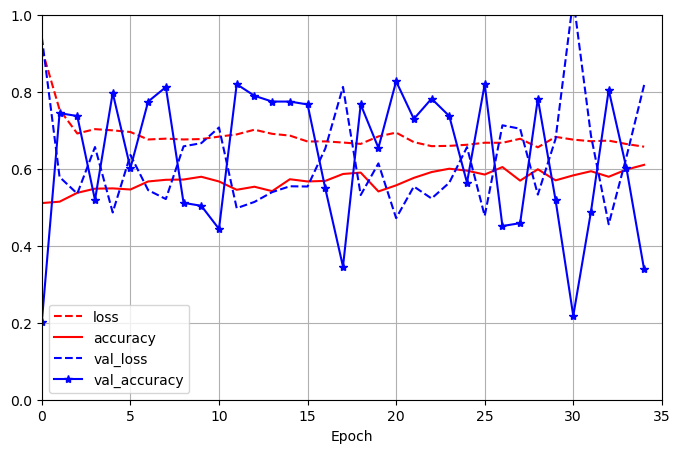

In [35]:
pd.DataFrame(history.history).plot(
    figsize = (8,5), xlim=[0,35], ylim=[0,1], grid=True, xlabel="Epoch",
    style=["r--", "r-", "b--", "b-*"]
)
plt.show()

In [36]:
y_pred = (mlp_model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

14/14 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.12      0.21       343
           1       0.24      0.96      0.38        99

    accuracy                           0.31       442
   macro avg       0.57      0.54      0.29       442
weighted avg       0.76      0.31      0.25       442



#### LSTM

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np

# Convert DataFrames to NumPy arrays
X_train_array = X_train.values
X_test_array = X_test.values

# Reshape the input data for LSTM
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)


def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        LSTM(32),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model


lstm_model = create_lstm_model(input_shape=(X_train_reshaped.shape[1], 1))
lstm_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])


history = lstm_model.fit(X_train_reshaped, y_train, epochs=35, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/35
44/44 [==============================] - 6s 31ms/step - loss: 0.6959 - accuracy: 0.4863 - val_loss: 0.7069 - val_accuracy: 0.2030
Epoch 2/35
44/44 [==============================] - 0s 11ms/step - loss: 0.6924 - accuracy: 0.5201 - val_loss: 0.6672 - val_accuracy: 0.7895
Epoch 3/35
44/44 [==============================] - 0s 11ms/step - loss: 0.6922 - accuracy: 0.5252 - val_loss: 0.6898 - val_accuracy: 0.5489
Epoch 4/35
44/44 [==============================] - 0s 11ms/step - loss: 0.6885 - accuracy: 0.5460 - val_loss: 0.6557 - val_accuracy: 0.6767
Epoch 5/35
44/44 [==============================] - 0s 11ms/step - loss: 0.6873 - accuracy: 0.5511 - val_loss: 0.6413 - val_accuracy: 0.6617
Epoch 6/35
44/44 [==============================] - 0s 11ms/step - loss: 0.6844 - accuracy: 0.5540 - val_loss: 0.6647 - val_accuracy: 0.5489
Epoch 7/35
44/44 [==============================] - 0s 11ms/step - loss: 0.6836 - accuracy: 0.5554 - val_loss: 0.6953 - val_accuracy: 0.5113
Epoch 8/35
44

In [38]:
# Evaluate the model
loss, accuracy = lstm_model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

14/14 [==============================] - 1s 4ms/step - loss: 0.6863 - accuracy: 0.5362
Test Loss: 0.6862748861312866, Test Accuracy: 0.5361990928649902


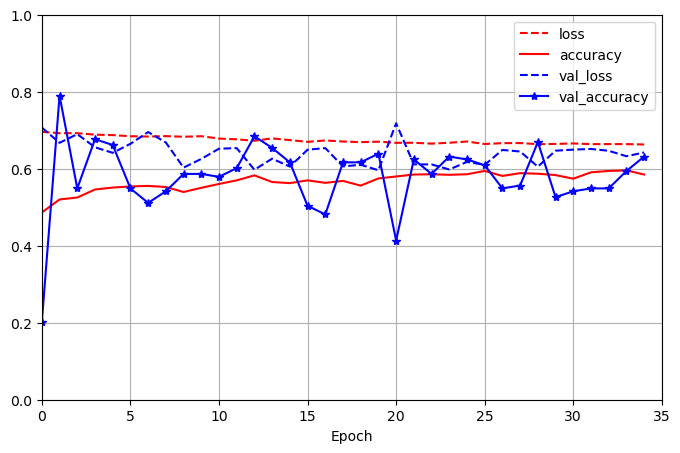

In [39]:
pd.DataFrame(history.history).plot(
    figsize = (8,5), xlim=[0,35], ylim=[0,1], grid=True, xlabel="Epoch",
    style=["r--", "r-", "b--", "b-*"]
)
plt.show()

In [40]:
y_pred = (lstm_model.predict(X_test_reshaped) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

14/14 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.81      0.52      0.64       343
           1       0.26      0.59      0.36        99

    accuracy                           0.54       442
   macro avg       0.54      0.55      0.50       442
weighted avg       0.69      0.54      0.57       442



### Model Comparison

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

# Define models
models = [best_svc_model, best_dt_model, best_knn_model, mlp_model, lstm_model]
model_names = ['SVC', 'Decision Tree', 'KNN', 'MLP', 'LSTM']

# Initialize lists
weighted_f1_scores = []
accuracy_scores = []
actual_labels = []
predicted_labels = []

# Calculate weighted F1-score and accuracy for each model
for model in models:
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)
    weighted_f1 = f1_score(y_test, y_pred_binary, average='weighted')
    weighted_f1_scores.append(weighted_f1)
    accuracy = accuracy_score(y_test, y_pred_binary)
    accuracy_scores.append(accuracy)
    actual_labels.append(y_test)
    predicted_labels.append(y_pred_binary)

14/14 [==============================] - 1s 4ms/step


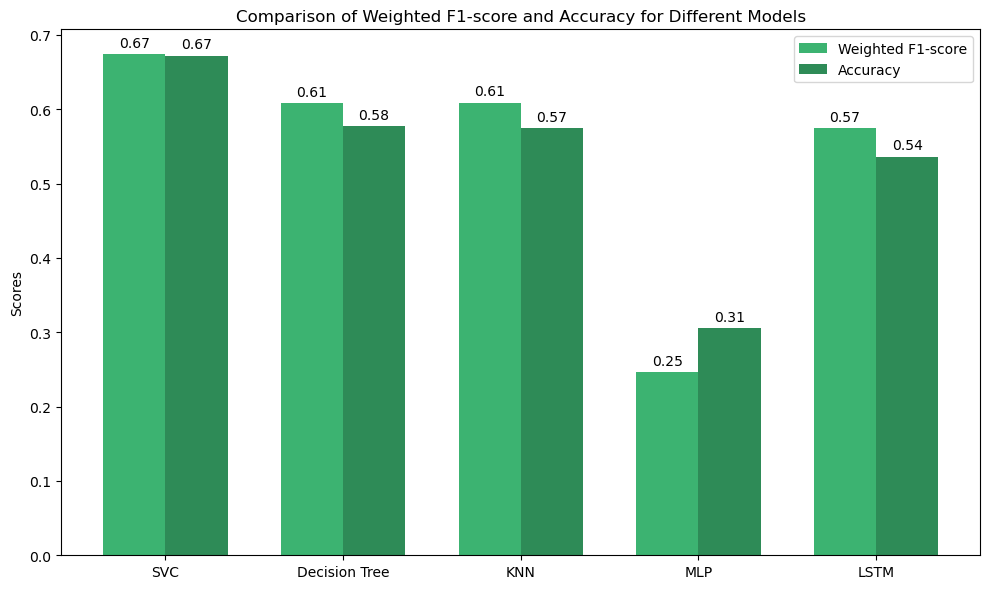

In [42]:
# Plot grouped bar chart
x = np.arange(len(model_names))
width = 0.35 

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, weighted_f1_scores, width, label='Weighted F1-score', color='mediumseagreen')
rects2 = ax.bar(x + width/2, accuracy_scores, width, label='Accuracy', color='seagreen')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Weighted F1-score and Accuracy for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Label bars with values
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()